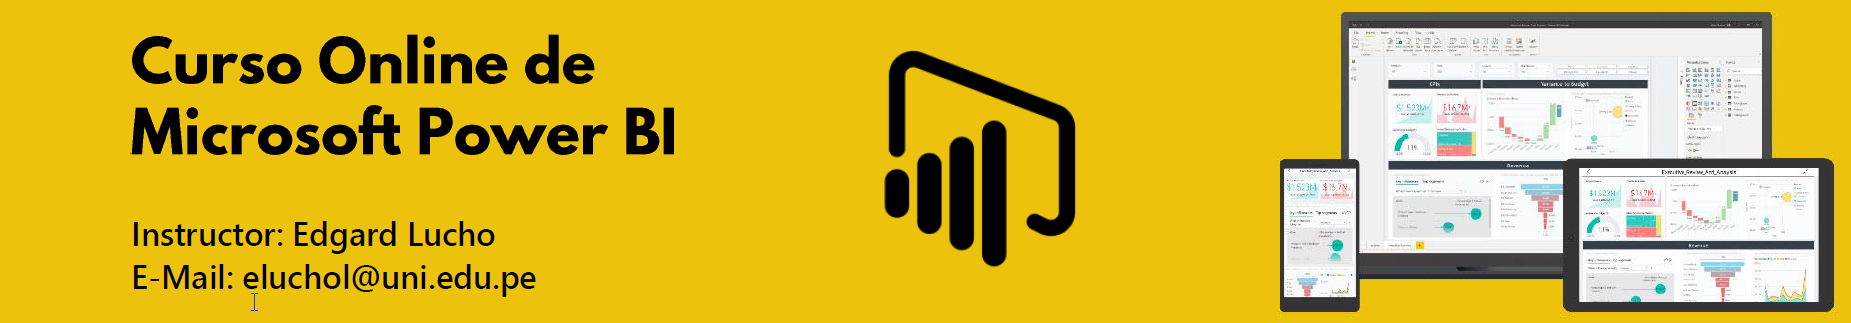

# **Módulo 3: Funciones DAX**

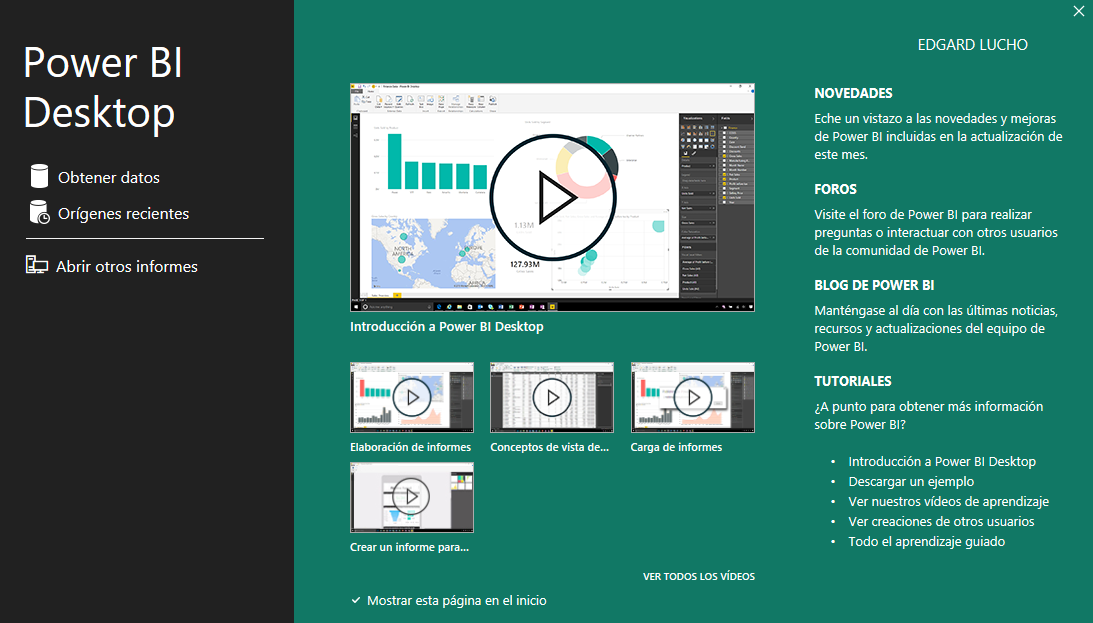

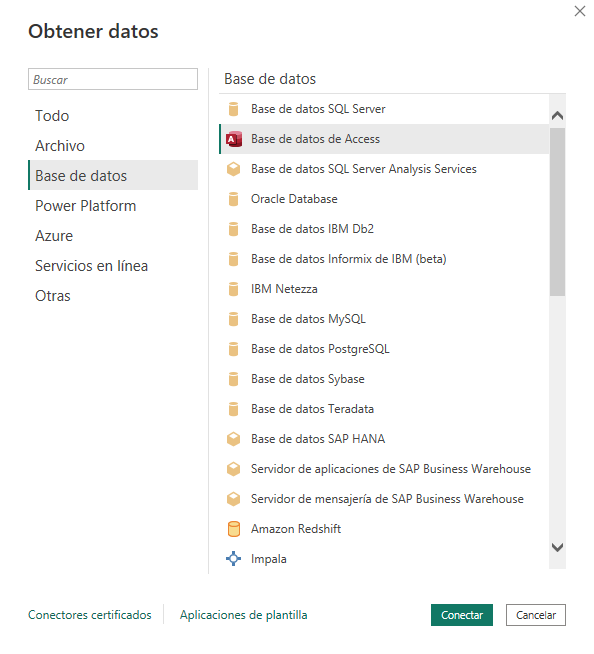

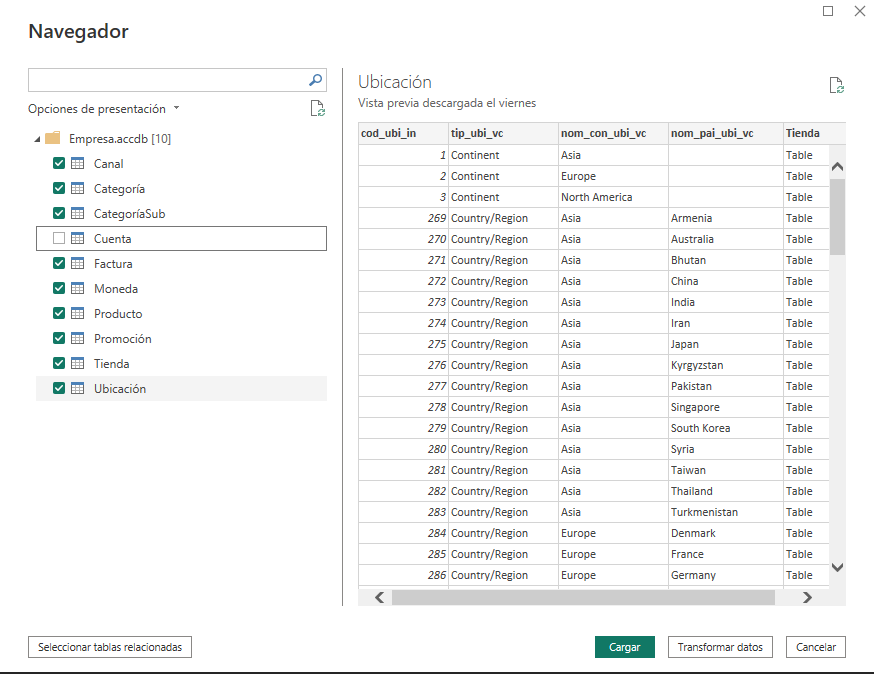

## **¿Qué son las funciones?**

Las funciones DAX (Data Analysis Expressions) son un conjunto de funciones utilizadas en Power BI y otras herramientas de análisis de datos de Microsoft, como Excel.

Estas funciones se utilizan para crear medidas, columnas calculadas y tablas calculadas en los modelos de datos de Power BI.

Las funciones DAX permiten a los usuarios realizar cálculos complejos y avanzados en los datos, como conteos, sumas, promedios, cálculos de fechas y muchas otras operaciones matemáticas y estadísticas.

También pueden utilizarse para filtrar y agrupar datos, crear fórmulas condicionales y realizar cálculos de tiempo y de duración.

## **Campo calculado para el monto de la compra**




```
Cantidad = (Factura[cnt_ven_fac_in]-Factura[cnt_ret_fac_in]-Factura[cnt_des_fac_in])

```





```
Precio sin descuento = RELATED(Producto[pre_ven_prd_mo])
```





```
Precio con descuento = 
RELATED(Producto[pre_ven_prd_mo])
*
(
    1 - 
    IF
    (
        // CONDICIÓN
            Factura[cnt_des_fac_in]==0
        &&
            Factura[fec_fac_dt]>=RELATED('Promoción'[fec_ini_pro_dt])
        &&
            Factura[fec_fac_dt]<=RELATED('Promoción'[fec_fin_pro_dt])
        ,
        // VERDADERA
            RELATED('Promoción'[por_des_pro_de])
        ,
        // FALSA
            0
    )
)
```





```
Monto 2 = Factura[Cantidad]*Factura[Precio con descuento]
```





```
Monto 1 = 
// Cálculo de las cantidades a cobrar
(Factura[cnt_ven_fac_in]-Factura[cnt_ret_fac_in]-Factura[cnt_des_fac_in])
*
RELATED(Producto[pre_ven_prd_mo])
*
(
    1 - 
    IF
    (
        // CONDICIÓN
            Factura[cnt_des_fac_in]==0
        &&
            Factura[fec_fac_dt]>=RELATED('Promoción'[fec_ini_pro_dt])
        &&
            Factura[fec_fac_dt]<=RELATED('Promoción'[fec_fin_pro_dt])
        ,
        // VERDADERA
            RELATED('Promoción'[por_des_pro_de])
        ,
        // FALSA
            0
    )
)
```



## **Medidas para el monto de la compra**

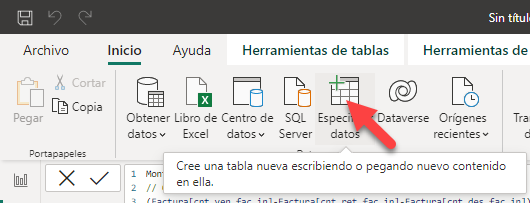

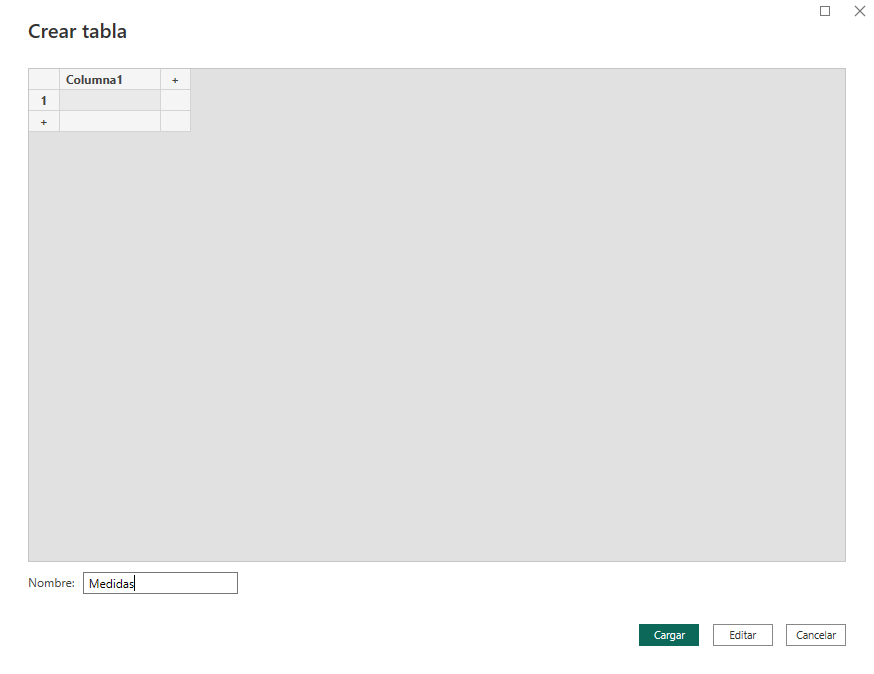



```
Total Ingresos = 
SUMX
(
    Factura,

    // Cálculo de las cantidades a cobrar
    (Factura[cnt_ven_fac_in]-Factura[cnt_ret_fac_in]-Factura[cnt_des_fac_in])
    *
    RELATED(Producto[pre_ven_prd_mo])
    *
    (
        1 - 
        IF
        (
            // CONDICIÓN
                Factura[cnt_des_fac_in]==0
            &&
                Factura[fec_fac_dt]>=RELATED('Promoción'[fec_ini_pro_dt])
            &&
                Factura[fec_fac_dt]<=RELATED('Promoción'[fec_fin_pro_dt])
            ,
            // VERDADERA
                RELATED('Promoción'[por_des_pro_de])
            ,
            // FALSA
                0
        )
    )
)
```



## **Tabla calculada para el calendario**



```
Calendario = 
ADDCOLUMNS
(
    CALENDAR
    (
        FIRSTDATE(Factura[fec_fac_dt]),
        LASTDATE(Factura[fec_fac_dt])
    ),
    "Fecha", [Date],
    "Año", YEAR([Date]),
    "Semestre", ROUNDUP(MONTH([Date])/6,0),
    "TrimNum", ROUNDUP(MONTH([Date])/3,0),
    "Trimestre", "T-" & ROUNDUP(MONTH([Date])/3,0),
    "Mes", UPPER(FORMAT([Date], "MMMM")),
    "MesNum", MONTH([Date]),
    "SemanaAño", WEEKNUM([Date]),
    "Día", FORMAT([Date],"DDDD"),
    "DiaNum", WEEKDAY([Date])
)
```





```
Cantidad de unidades devueltas = SUMX(Factura,Factura[cnt_ret_fac_in])
```





```
Cantidad ventas = SUMX(Factura,Factura[cnt_ven_fac_in]-Factura[cnt_ret_fac_in]-Factura[cnt_des_fac_in])
```





```
Ratio de devoluciones = DIVIDE([Cantidad de unidades devueltas],[Cantidad ventas])
```





```
Total Costos = SUMX(Factura,Factura[cnt_ven_fac_in]*Factura[pre_cos_fac_mo])
```





```
Total Utilidad = [Total Ingresos]-[Total Costos]
```



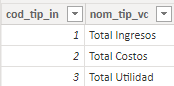



```
Tipo = 
IF 
(
    ISCROSSFILTERED('Tipo de gráfico'[nom_tip_vc]),
    SWITCH
    (
        TRUE(),
        VALUES('Tipo de gráfico'[nom_tip_vc]) = "Total Ingresos", [Total Ingresos],
        VALUES('Tipo de gráfico'[nom_tip_vc]) = "Total Costos", [Total Costos],
        VALUES('Tipo de gráfico'[nom_tip_vc]) = "Total Utilidad", [Total Utilidad],
        [Total Ingresos]
    ),
    [Total Ingresos]
)
```



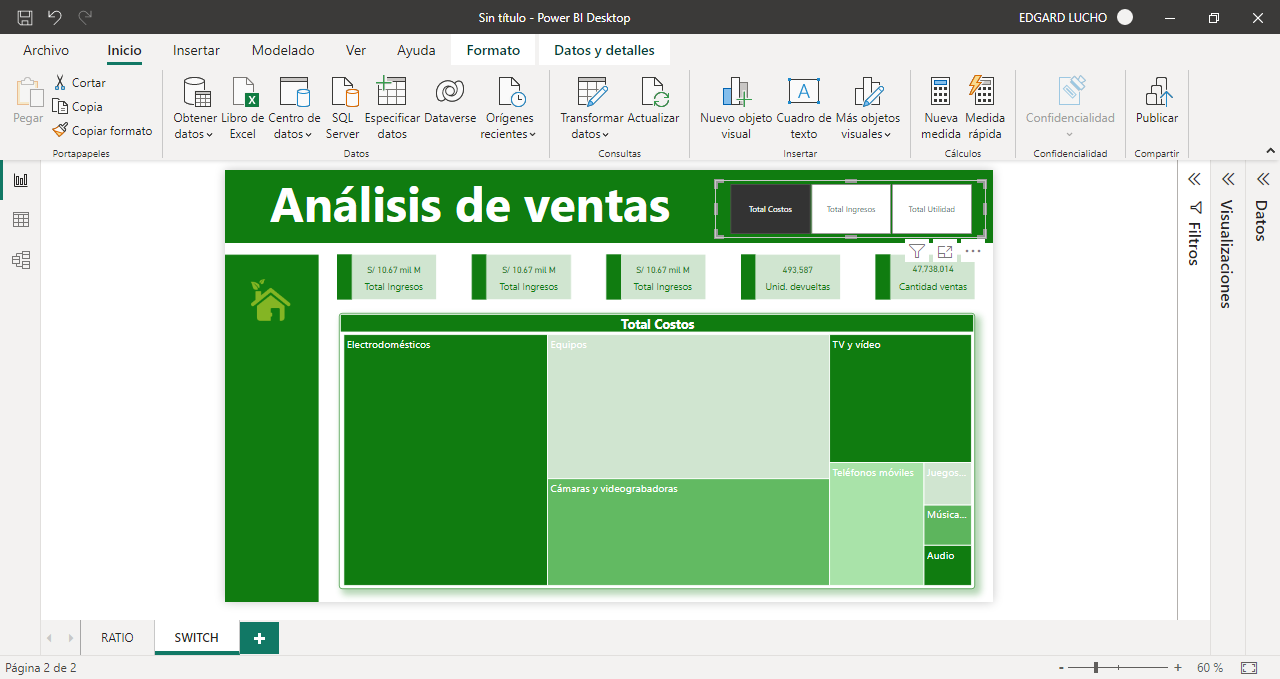

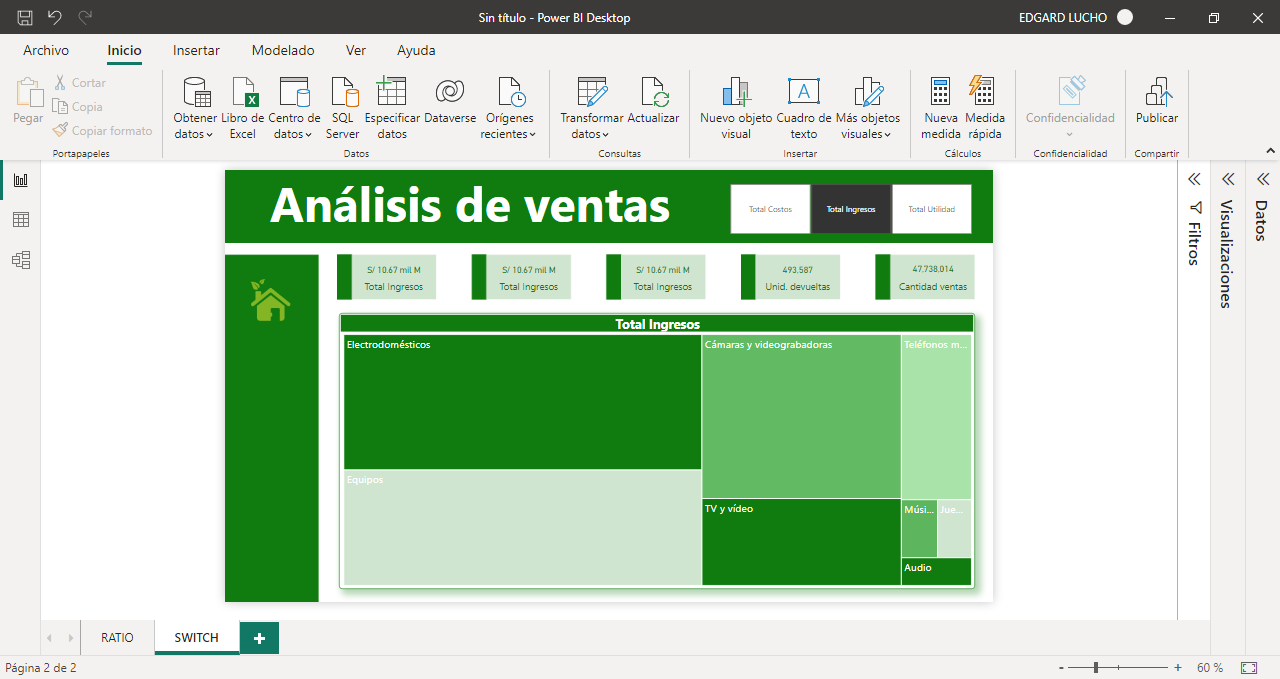

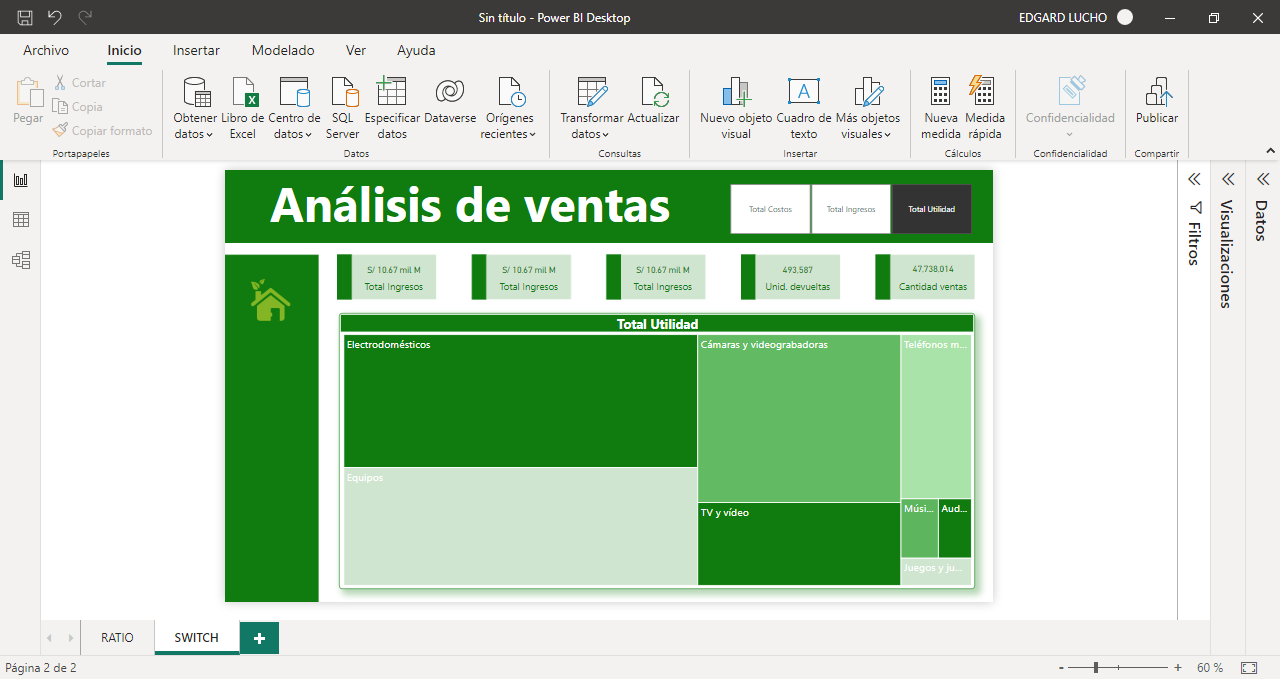